Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "James Shen"

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('car_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# Question 1 (3 points)

#  Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.
#
fuel_dummy = pd.get_dummies(df['Fuel_Type'])
fuel_dummy.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [5]:
transm_dummy = pd.get_dummies(df['Transmission'])
transm_dummy.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [6]:
seller_dummy = pd.get_dummies(df['Seller_Type'])
seller_dummy.head()

,Dealer,Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
#  Concatenate 3 newly created dummy variables to the existing DataFrame
#  Use axis=1 to make sure concatenating along column, rather than default index
#
df = pd.concat([df, fuel_dummy, transm_dummy, seller_dummy], axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


In [8]:
# Question 2 _(3 points)

#  Create a new column which captures the age of the car as 'new' or 'old'.
#
#  Comment: According to the dataset description, selling price is the current selling 
#           price of the used car, and present price is the price of the same car but new. 
#           It means that if the selling price is greater or equal to the present price, 
#           then probably it is a new car.
#
df['age'] = 'old'
df.loc[df['Selling_Price'] >= df['Present_Price'], 'age'] = 'new'
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old


In [9]:
# Question 3 _(3 points)

#  Scale the Kms_Driven, Selling_Price, and Present_Price variables 
#  (i.e. ensure the variables have the same scale - thousands or tens. 
#   You can choose whichever scale you prefer).

#  I have tried all different normalization methods, and the R-squared
#  value for the model that I choose is not affected. I will explain 
#  those later. At this moment, I will try and then comment all the 
#  normalization methods:

#  1. Min-Max (or range)
#
df['Kms_Driven_bar'] = (df['Kms_Driven'] - df['Kms_Driven'].min()) \
                     / (df['Kms_Driven'].max() - df['Kms_Driven'].min())
df['Selling_Price_bar'] = (df['Selling_Price'] - df['Selling_Price'].min()) \
                        / (df['Selling_Price'].max() - df['Selling_Price'].min())
df['Present_Price_bar'] = (df['Present_Price'] - df['Present_Price'].min()) \
                        / (df['Present_Price'].max() - df['Present_Price'].min())

#  2. L2 norm (or Euclidean distance)
#
#df['Kms_Driven_bar'] = df['Kms_Driven'] / np.linalg.norm(df['Kms_Driven'])
#df['Selling_Price_bar'] = df['Selling_Price'] / np.linalg.norm(df['Selling_Price'])
#df['Present_Price_bar'] = df['Present_Price'] / np.linalg.norm(df['Present_Price'])

#  3. zscore (or standardization)
#
#df['Kms_Driven_bar'] = (df['Kms_Driven'] - df['Kms_Driven'].mean()) \
#                      / df['Kms_Driven'].std()
#df['Selling_Price_bar'] = (df['Selling_Price'] - df['Selling_Price'].mean()) \
#                         / df['Selling_Price'].std()
#df['Present_Price_bar'] = (df['Present_Price'] - df['Present_Price'].mean()) \
#                         / df['Present_Price'].std()

#  4. Do nothing (no Normalization at all)
#
#df['Kms_Driven_bar'] = df['Kms_Driven']
#df['Selling_Price_bar'] = df['Selling_Price']
#df['Present_Price_bar'] = df['Present_Price']

#  I scale the original values this way (below) just to keep their value meaningful
#
df['Kms_Driven'] = df['Kms_Driven'] * 1
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Kms_Driven_bar,Selling_Price_bar,Present_Price_bar
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159,0.072967,0.130696,0.079199
std,2.891554,5082.811556,8644.115402,38886.883882,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439,0.077852,0.145639,0.093673
min,2003.000000,100.000000,320.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.029029,0.022923,0.009536
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.063063,0.100287,0.065886
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.096631,0.169054,0.103814
max,2018.000000,35000.000000,92600.000000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Question 4 (3 points)

#  Conduct exploratory analysis for the categorical variables. What are you findings?

#  The categorical variables in this dataset are: 
#      Car_Name, Fuel_Type, Seller_Type, Transmission, and Owner

#  I will calculate and sort the percentage of the 'Car_Name' first. 
#  'Year' can be any column other than 'Car_Name'
#
my_percent = df.groupby('Car_Name')['Year'].apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename('%').sort_values(ascending=False).to_frame()
my_percent.head()

,%
Car_Name,
city,8.637874
corolla altis,5.315615
verna,4.651163
fortuner,3.654485
brio,3.322259


In [11]:
#  Another way to get the same percentage result (i.e. Using DataFrame instead of Series)
#
my_percent = df[['Car_Name']].groupby('Car_Name').apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename(columns={'Car_Name':'%'}).sort_values(by=['%'], ascending=False)
my_percent.head()

,%
Car_Name,
city,8.637874
corolla altis,5.315615
verna,4.651163
fortuner,3.654485
brio,3.322259


Above result listed 5 most popular cars in this dataset. It shows 'City' is the most popular car, followed by 'Corolla altis'.

In [12]:
#  Next, do 'Fuel_Type'
#
my_percent = df[['Fuel_Type']].groupby('Fuel_Type').apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename(columns={'Fuel_Type':'%'}).sort_values(by=['%'], ascending=False)
my_percent.head()

,%
Fuel_Type,
Petrol,79.401993
Diesel,19.933555
CNG,0.664452


Above result shows that most of the cars are fueled by 'Petrol' (79.4%), followed by Diesel (19.6%). Only 0.66% of the cars in this dataset are fueled by CNG.

In [13]:
#  Next, do 'Transmission'
#
my_percent = df[['Transmission']].groupby('Transmission').apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename(columns={'Transmission':'%'}).sort_values(by=['%'], ascending=False)
my_percent.head()

,%
Transmission,
Manual,86.710963
Automatic,13.289037


Above result shows that most of the cars are using 'Manual' transmission (86.7%). The rest of cars are using 'Automatic' transmission (13.3%).

In [14]:
#  Next, do 'Seller_Type'
#
my_percent = df[['Seller_Type']].groupby('Seller_Type').apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename(columns={'Seller_Type':'%'}).sort_values(by=['%'], ascending=False)
my_percent.head()

,%
Seller_Type,
Dealer,64.784053
Individual,35.215947


Above result shows that most of the cars are sold by Dealers (64.8%). The rest of cars are sold by the individual themselves.

In [15]:
#  Next, do 'Owner'
#
my_percent = df[['Owner']].groupby('Owner').apply( lambda x: 100 * x.count() / len(df) )
my_percent = my_percent.rename(columns={'Owner':'%'}).sort_values(by=['%'], ascending=False)
my_percent.head()

,%
Owner,
0,96.345515
1,3.322259
3,0.332226


Above result shows that most of the cars are sold by the original owners (96.3%).

The exploratory analysis for the categorical variables can actually be conducted together with the continuous variables. The box plot below shows the exploratory analysis for categorical variable 'Transmission' and the continuous variable 'Selling_Price':

<AxesSubplot: xlabel='Transmission', ylabel='Selling_Price'>

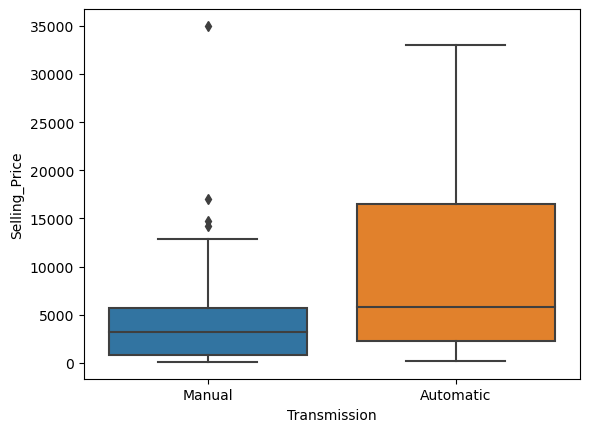

In [16]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df)

Above result tells us that the median selling price of the automatic car is higher than the median selling price of the manual car. In this dataset, there is no outlier for the selling price of the automatic car, but there are a few outliers for the selling price of the manual car.

<AxesSubplot: xlabel='Fuel_Type', ylabel='Selling_Price'>

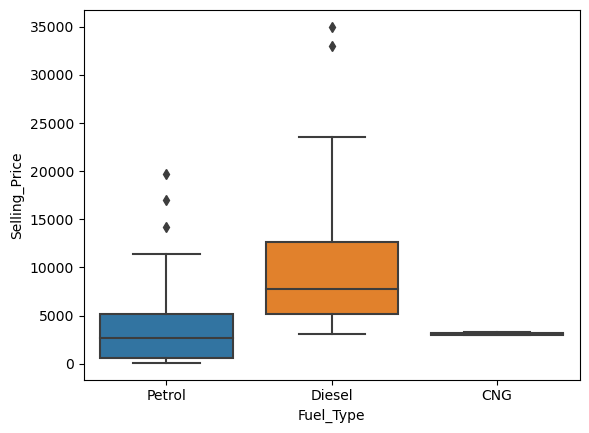

In [17]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)

Above result tells us that the median selling price of the diesel car is higher than the median selling price of the petrol car. The median selling price of the CNG car is similar to the median selling price of the petrol car. Both petrol car and diesel car have some outlier for the selling price in this dataset.

<AxesSubplot: xlabel='Seller_Type', ylabel='Selling_Price'>

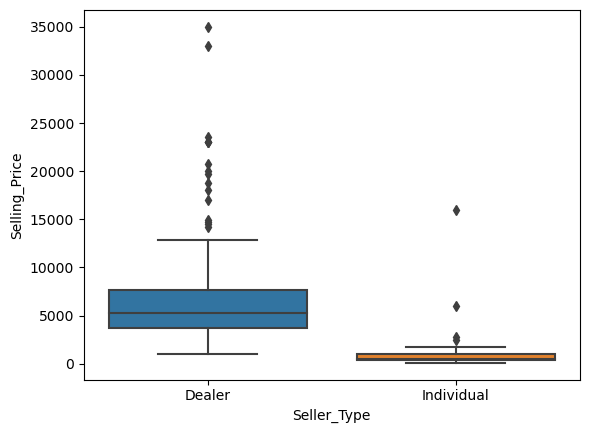

In [18]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)

Above result tells us that the median selling price with dealer is higher than the median selling price with individual. This is so obvious because dealers will not be able to earn living if they are not capable to sell car at higher price than the individuals. Both dealer and individual have some outlier for the selling price in this dataset.

In [19]:
# Question 5 (10 points)

#  Conduct exploratory analysis for the continuous variables. Ensure you review 
#  each variable by itself, and in combination with the other variables 
#  to identify insights and trends. What are your findings?

#  The continuous variables in this dataset are:
#
field_list = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

data = []

for field in field_list:
    data.append(df[field])

#  First take a look at the statistics summary
#
df[field_list].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980
std,2.891554,5082.811556,8644.115402,38886.883882
min,2003.000000,100.000000,320.000000,500.000000
25%,2012.000000,900.000000,1200.000000,15000.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000
max,2018.000000,35000.000000,92600.000000,500000.000000


Statistics summary tells us that those are all old cars from year 2003 to year 2018 with an average of 2013.627907. Fifty percent of those cars were built in between year 2012 and year 2016 with a median of 2014.

From the percentile, we can also tell that more cars were built in last 6 years (2012-2018) then first 9 years (2003-2012), so the data is pretty much very skewed.

Similar phenomena also happen to the rest of the continuous variables. In order to know better, I will plot the histogram for all those continuous variables:

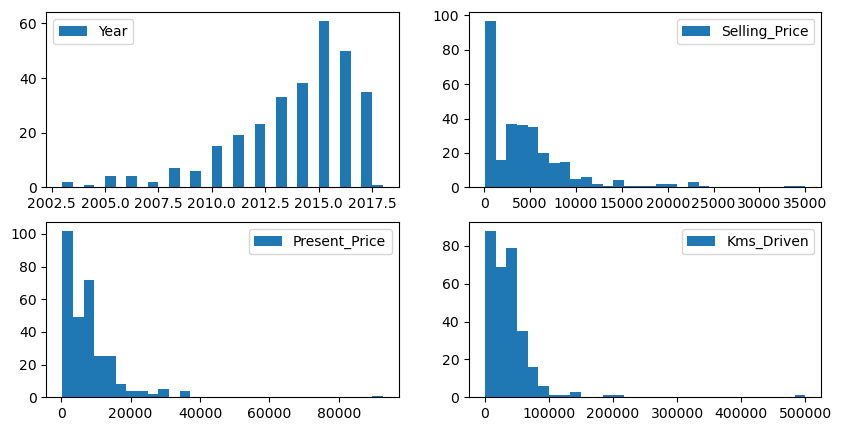

In [20]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = [10,5]);
all_ax = [ax1, ax2, ax3, ax4];
idx = 0;

for field in field_list:
    data[idx].hist(ax=all_ax[idx], legend=True, grid=False, bins=30);
    idx += 1;

Box plot displays the quartiles and whiskers, which is another way to show the spread and skewness of the numerical data:

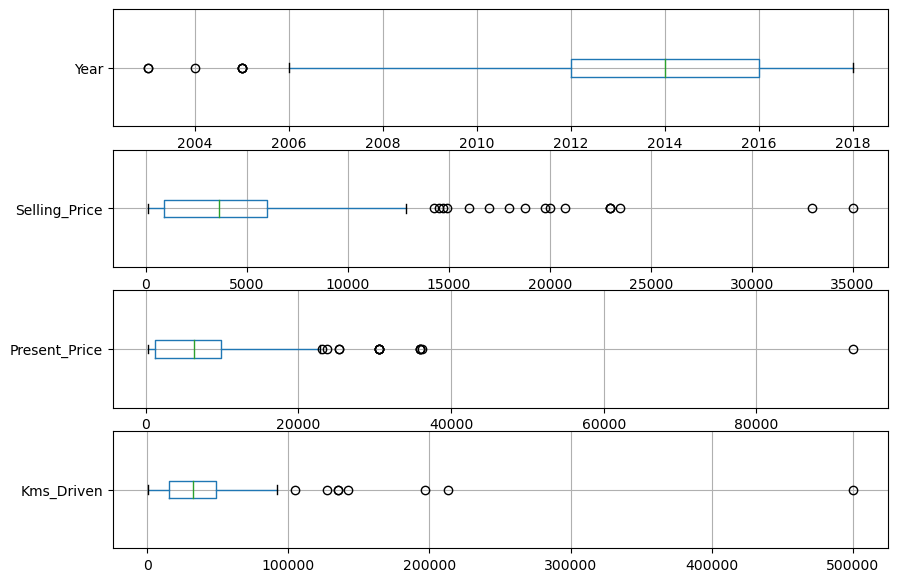

In [21]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize = [10,7]);
all_ax = [ax1, ax2, ax3, ax4];
idx = 0;

for field in field_list:
    df[[field]].boxplot(ax=all_ax[idx], vert=False)
    idx += 1;

The separate dots beyond the whiskers are the outliers. For example, the 3 dots (actually 7 data points) before year 2006 are the outliers for the 'Year' variable. The 7 dots (actually 8 data points) after 100K km are the outliers for 'Kms_Driven' variable. Similar phenomena also happen to the 'Selling_Price' and 'Present_Price' variables.

Besides reviewing each variable by itself, we can also combine those variables to identify insights and trends.

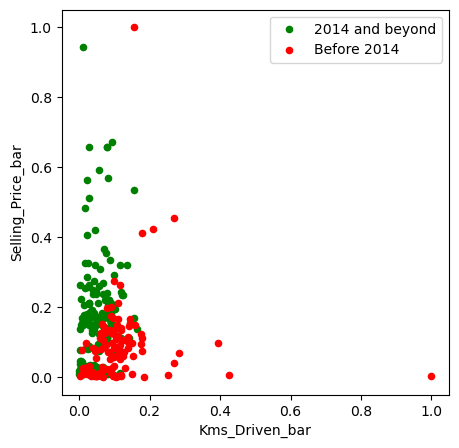

In [22]:
#  First let's take a look at the combination of 'Selling_Price' variable 
#  and 'Kms_Driven' variable
#
fig, ax = plt.subplots(figsize = [5,5]);
df[df['Year']>=2014].plot(ax=ax, kind='scatter', label='2014 and beyond', 
                          x='Kms_Driven_bar', y='Selling_Price_bar', c='g');
df[df['Year']<2014].plot(ax=ax, kind='scatter', label='Before 2014', 
                         x='Kms_Driven_bar', y='Selling_Price_bar', c='r');

From the plot above, we noticed that instead of 'Kms_Driven' variable the 'Year' variable has more influence to the 'Selling_Price' variable. Therefore, I decided to combine the 'Year' variable with the 'Selling_Price' variable to see if we can identify any trend:

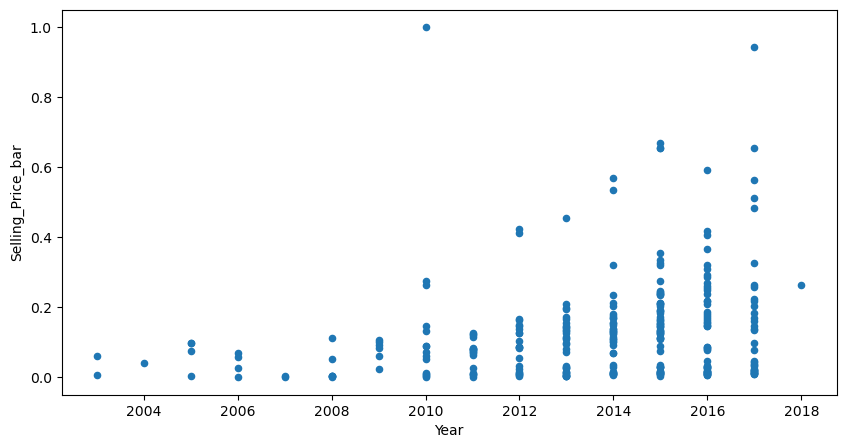

In [23]:
fig, ax = plt.subplots(figsize = [10,5]);
df.plot(ax=ax, kind='scatter', x='Year', y='Selling_Price_bar');

As is expected, the above plot clearly tells us that: "The older the car, the cheaper the selling price". Since the 'Year' variable in our dataset is by year, the data points in this scatter plot are also clustered by year. I am going to use the yearly mean value to create a fit curve to monitor the trend. We also noticed that the 35K selling price in year 2010 is an obvious outlier, so I am going to remove it before I generate the fit curve:

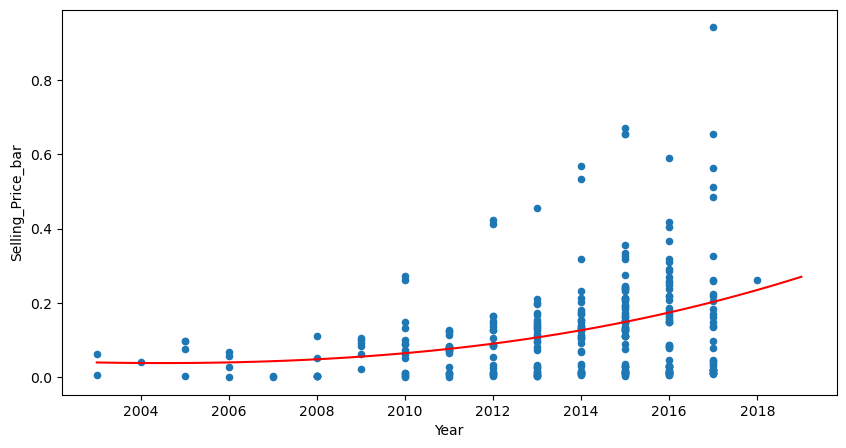

In [24]:
#  Before removing outliers, let's keep a copy of the version with outliers kept
#  .copy() must be used to copy by value, not by reference (or pointer)
#
df_with_outlier = df.copy()

#  Remove the outlier 2010 (35K) for normalized selling price
#  Do this first so we can still use selling price to index next
#
df.loc[(df['Selling_Price']==35000) & (df['Year']==2010),'Selling_Price_bar'] = \
    df.loc[(df['Selling_Price']!=35000) | (df['Year']!=2010),'Selling_Price_bar'].median()

#  Remove the outlier 2010 (35K) for selling price
#
df.loc[(df['Selling_Price']==35000) & (df['Year']==2010),'Selling_Price'] = \
    df.loc[(df['Selling_Price']!=35000) | (df['Year']!=2010),'Selling_Price'].median();

#  Bring 'Year' back to column, and try to draw a fit line of the yearly mean value
#
df_mean = df[['Year','Selling_Price_bar']].groupby(['Year']).mean().reset_index();

#  Regression coefficient for the fit line of the yearly mean value
#
coeff = np.polyfit(df_mean['Year'], df_mean['Selling_Price_bar'], 3);
fit_curve_x = np.linspace(2003, 2019, 50);
fit_curve_y = np.polyval(coeff, fit_curve_x);

#  Plot again with fit line and outlier removed
#
fig, ax = plt.subplots(figsize = [10,5]);
df.plot(ax=ax, kind='scatter', x='Year', y='Selling_Price_bar');
ax.plot(fit_curve_x, fit_curve_y, c='r');

Now, let's also take a look at the combination between 'Year' variable and the 'Present_Price' variable. Since the obvious outlier for present price in 2010 (92.6K) affects the display, I removed it before the plot is displayed below:

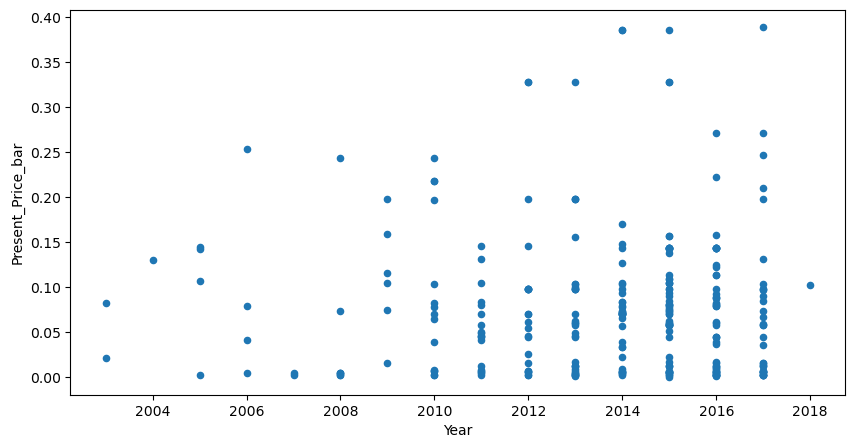

In [25]:
#  Remove the outlier 2010 (92.6K) for normalized present price
#  Do this first so we can still use selling price to index next
#
df.loc[(df['Present_Price']==92600) & (df['Year']==2010),'Present_Price_bar'] = \
    df.loc[(df['Present_Price']!=92600) | (df['Year']!=2010),'Present_Price_bar'].median()

#  Remove the outlier 2010 (92.6K) for present price
#
df.loc[(df['Present_Price']==92600) & (df['Year']==2010),'Present_Price'] = \
    df.loc[(df['Present_Price']!=92600) | (df['Year']!=2010),'Present_Price'].median();

fig, ax = plt.subplots(figsize = [10,5]);
df.plot(ax=ax, kind='scatter', x='Year', y='Present_Price_bar');

Above plot tells us that the present price is not as much affected by the "Year" variable as the selling price does. Will the present price for the same kind car affect the selling price? Let's find out:

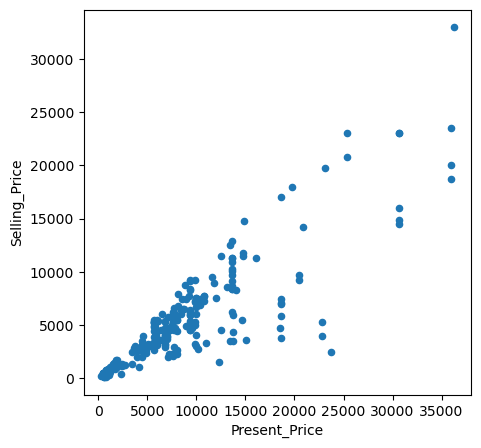

In [26]:
fig, ax = plt.subplots(figsize = [5,5]);
df.plot(ax=ax, kind='scatter', x='Present_Price', y='Selling_Price');

From the plot above, we noticed that all dots are located at lower right triangle, and most dots are close to (and below) the diagnoal line. This means that although the selling prices are kind of related to the present prices, they are all less than the present price. This is so obvious, because no one will buy an old car at a higher price. Finally, let's take a look at how "Kms_Driven" variable is affected by "Year" variable. Theoretically, "The older the car, the more the kms is driven". Let's take a look:

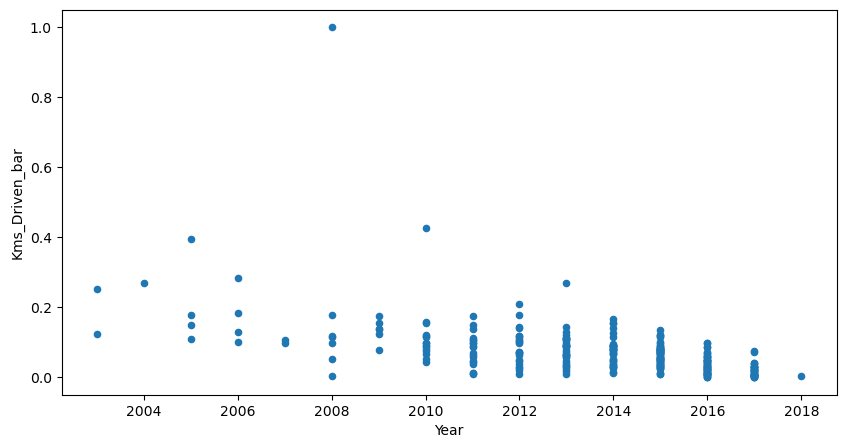

In [27]:
fig, ax = plt.subplots(figsize = [10,5]);
df.plot(ax=ax, kind='scatter', x='Year', y='Kms_Driven_bar');

From the above plot, I noticed that the result is "Kms_Driven" to "Year" relationship is not as simple as "The older the car, the more the kms is driven". For cars 2013 and beyond (less than 10 years old), it seems to be true that "The older the car, the more the kms is driven". However, for very old car (more than 10 years old, or cars earlier than 2013), the "Kms_Driven" are relatively high, but seems not as much affected by the "Year" variable as those less than 10 years old cars do. Here's what I guess (may not be true): Those very old cars have almost reached their life expectancy (around 100K km or more), and probably some expensive major parts need to be replaced. Therefore, the owners decided to not drive them any more (so Kms_Driven stay at that level), and they decided to sell them.

In [28]:
# Question 6 (1 point)

#  Based on the insights identified, state a hypothesis which you can test with a regression model.

If the value of independent variable 'Year' decreases or the value of independent variable 'Present_Price' drops, then the value of dependent variable 'Selling_Price' will drop.

In [29]:
# Question 7 (5 points)

#  Build a linear regression model based on your hypothesis. Interpret the results.

I am going to apply the ordinary linear regression model from Statiticss Model API to my hypothesis. The selling price is what we are going to predicted, so assign it to the response vector Y. The 'Present_Price' and 'Year' are the predictors. Together with the constant for intercept, we can create the design matrix X:

In [30]:
Y = df['Selling_Price_bar']
X = df[['Year','Present_Price_bar']]
X = sm.add_constant(X)
Y.to_frame()

,Selling_Price_bar
0,0.093123
1,0.133238
2,0.204871
3,0.078797
4,0.128940
...,...
296,0.269341
297,0.111748
298,0.093123
299,0.326648


In [31]:
X

,const,Year,Present_Price_bar
0,1.0,2014,0.057109
1,1.0,2013,0.099913
2,1.0,2017,0.103273
3,1.0,2011,0.041504
4,1.0,2014,0.070980
...,...,...,...
296,1.0,2016,0.122237
297,1.0,2015,0.060468
298,1.0,2009,0.115735
299,1.0,2017,0.131990


In [32]:
#  Apply the ordinary linear regression model from Statiticss Model API to the design matrix X
#  and response vector Y. Find the fit result with estimators.
#
ols_model = sm.OLS( Y, X )
ols_result = ols_model.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Selling_Price_bar   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     941.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.60e-129
Time:                        02:21:36   Log-Likelihood:                 471.94
No. Observations:                 301   AIC:                            -937.9
Df Residuals:                     298   BIC:                            -926.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.1610      2.039    -13.324      0.000     -31.173     -23.149
Year                  0.0135      0.001     13.328      0.000       0.012       0.015
Present_Price_bar     1.5720      0.038     41.387      0.000       1.497       1.647
==============================================================================
Omnibus:                       47.332   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.172
Skew:                           0.065   Prob(JB):                    1.96e-100
Kurtosis:                       9.049   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As We can see, the R-squared value 0.86 is not that bad. It means that this model can explain outcomes. In other words, we can use the 'Year' variable and 'Present_Price' variable to predict the 'Selling_Price'. In addition, the P-Value 1.60e-129 is very close to 0. It means that this model is statistically significant. In other words, the selling price that we predicted from the independent variables 'Year' and 'Present_Price' is not purely by chance. Below I am going to add another column in the DataFrame for the predicted selling price, and I call it variable 'Selling_Price_hat':

In [33]:
df['Selling_Price_hat'] = ols_result.predict(X)     # use result model to predict input variables
df['Selling_Price_hat'] = ols_result.fittedvalues   # use fittedvalues to get same result for X

Now let's visualize the difference between the predicted selling price 'Selling_Price_hat' and the measured selling price 'Selling_Price'. In the scattered plot below, red stands for the predicted selling price, and green stands for the measured selling price:

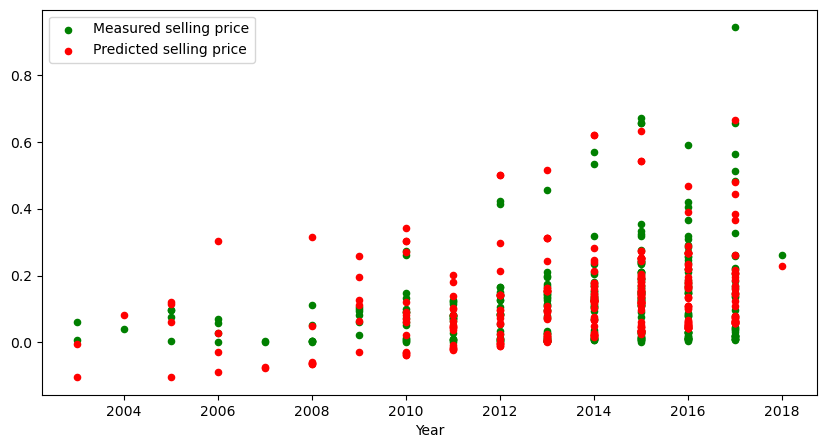

In [34]:
fig, ax = plt.subplots(figsize = [10,5]);
df.plot(ax=ax, kind='scatter', x='Year', y='Selling_Price_bar', c='g', 
        label='Measured selling price');
df.plot(ax=ax, kind='scatter', x='Year', y='Selling_Price_hat', c='r',
        label='Predicted selling price');
ax.set_ylabel('');

In [35]:
#  Question 8 (2 points)

# How could you make your model better? 
# Is there data that you think would be helpful to achieve a higherd R2 value?

#  Let's compare the result with outlier kept
#
Y = df_with_outlier['Selling_Price_bar']
X = df_with_outlier[['Year','Present_Price_bar']]
X = sm.add_constant(X) 
ols_model = sm.OLS( Y, X )
ols_result = ols_model.fit()
print('R-squared: ', ols_result.rsquared)
print('Prob (F-statistic): ', ols_result.f_pvalue)

R-squared:  0.8500511302128501
Prob (F-statistic):  1.6426169763291208e-123


As you can see above, the R-squared value decreased once I include the outlier.

Now let's still use the dataset with outlier removed, and include the dummy variables that we created before:

In [36]:
Y = df['Selling_Price_bar']
X = df[['Year','Present_Price_bar', 'CNG', 'Diesel', 'Petrol', 'Automatic', 'Manual', 'Dealer', 'Individual']]
X = sm.add_constant(X) 
ols_model = sm.OLS( Y, X )
ols_result = ols_model.fit()
print('R-squared: ', ols_result.rsquared)
print('Prob (F-statistic): ', ols_result.f_pvalue)

R-squared:  0.8763655993615166
Prob (F-statistic):  2.9723350591952037e-130


Once I included the dummy variables for the Fuel_Type, Transmission and Seller_Type variables, I noticed that the R2 value increased more than 1.5%, and the P-Value becomes even smaller! Therefore, those dummy variables are helpful to achieve a higherd R2 value and smaller P-Value.

Let's include the outlier again:

In [37]:
Y = df_with_outlier['Selling_Price_bar']
X = df_with_outlier[['Year','Present_Price_bar', 'CNG', 'Diesel', 'Petrol', 'Automatic', 'Manual', 'Dealer', 'Individual']]
X = sm.add_constant(X) 
ols_model = sm.OLS( Y, X )
ols_result = ols_model.fit()
print('R-squared: ', ols_result.rsquared)
print('Prob (F-statistic): ', ols_result.f_pvalue)

R-squared:  0.8796590108622973
Prob (F-statistic):  5.65777107825866e-132


As you can see above, we achieved an even higher R-squared value once I include the outlier. This probably means that the outliers have strong relations with those dummy variables.

Finally, I would say that the normalization has no impact to this linear regression model.

Although I don't know the reason, but I have tried 4 different types of normalization methods:

1. Min-Max method that we were taught on the course;
2. Normalized by L2 norm or Euclidean distance;
3. Standardization method (i.e. zscore)
4. Do nothing (using value from original data points as is)

This can be done by uncomment one method of code and comment the one that was using. I repeated code in the code cell below, and have them all commented.

For all of them, I got the same R-squared value and P-value.

In [38]:
#  1. Min-Max (or range)
#
#df['Kms_Driven_bar'] = (df['Kms_Driven'] - df['Kms_Driven'].min()) \
#                     / (df['Kms_Driven'].max() - df['Kms_Driven'].min())
#df['Selling_Price_bar'] = (df['Selling_Price'] - df['Selling_Price'].min()) \
#                        / (df['Selling_Price'].max() - df['Selling_Price'].min())
#df['Present_Price_bar'] = (df['Present_Price'] - df['Present_Price'].min()) \
#                        / (df['Present_Price'].max() - df['Present_Price'].min())

#  2. L2 norm (or Euclidean distance)
#
#df['Kms_Driven_bar'] = df['Kms_Driven'] / np.linalg.norm(df['Kms_Driven'])
#df['Selling_Price_bar'] = df['Selling_Price'] / np.linalg.norm(df['Selling_Price'])
#df['Present_Price_bar'] = df['Present_Price'] / np.linalg.norm(df['Present_Price'])

#  3. zscore (or standardization)
#
#df['Kms_Driven_bar'] = (df['Kms_Driven'] - df['Kms_Driven'].mean()) \
#                      / df['Kms_Driven'].std()
#df['Selling_Price_bar'] = (df['Selling_Price'] - df['Selling_Price'].mean()) \
#                         / df['Selling_Price'].std()
#df['Present_Price_bar'] = (df['Present_Price'] - df['Present_Price'].mean()) \
#                         / df['Present_Price'].std()

#  4. Do nothing (no Normalization at all)
#
#df['Kms_Driven_bar'] = df['Kms_Driven']
#df['Selling_Price_bar'] = df['Selling_Price']
#df['Present_Price_bar'] = df['Present_Price']